<a href="https://colab.research.google.com/github/ahmadxcix/encoder-decoder/blob/main/Encoder_Decoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4
**Name:** Ahmed Badawood \\
**ID:** 201771730 \\
**Instructor:** Dr. Hamzah Luqman

This Homoework is for the Deep Learning Course `ICS471` at `KFUPM`


## The Homework

Sign language recognition is the task of recognizing the sign performed by deaf people. Sign gestures can be isolated (one sign per video) or continuous (several signs per video). In this assignment, you will develop a deep learning model for sign language recognition at the sentence level. This task is similar to the video captioning task where the input will be a sign video and the output will be the performed sign(s) by the signer in the text format. An example of the input and output of the system is shown below.

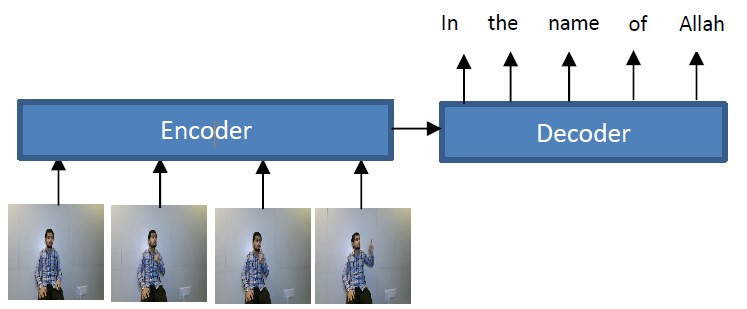

## Importing Dependencies

In [ ]:
!pip install -q git+https://github.com/tensorflow/docs

In [ ]:
from tensorflow_docs.vis import embed
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers.merge import add
import keras.backend as K
import numpy as np
import imageio
import cv2

import os
from os import listdir
from os.path import isfile, join

import pickle


import warnings
warnings.filterwarnings("ignore") 

## Prepare the dataset

The dataset consist of train folder and test folder. Each folder consist of 10 subfolders, represnting the classes. Each classes there are videos, the number of videos is different for each class. Each video consist of 80 frames.

In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/ICS471-HW4'

/content/drive/MyDrive/Colab Notebooks/ICS471-HW4


In [ ]:
trainpath ='train/'
testpath  ='test/'
trainlist = {}
testlist  = {}

There are 3 checkpoints files which I made to save the time of downloading and extracting features. the file `features_extracted` contains the extracted features of the train and test videos. this is the important file which contains the needed information. If the `features_extracted` file was not available the running will take more time.

The second important file is `traincheckpoint1` file. which contains the the information of the train videos. It took from the orignial dataset 20 frames for each videofrom the , like thi (0, 3, 7, 11,...,79), not consecutive. 

The `testcheckpoint1` file is for the test videos. It is small so it will take short time to read the frames.


### Train videos

If the `traincheckpoint1` file is available, then the saved dictionary will be loaded. If it is not, the program will iterate through the classes and download the frames, then uploaded it to a new file named `traincheckpoint1`

take only 20 frames from the video. to safe space

In [ ]:
# if the traincheckpoint1 exists but features_extracted not
if isfile('traincheckpoint1') and not isfile('features_extracted'):
    with open('traincheckpoint1', 'rb') as f:
        data = pickle.load(f)
        trainlist = data['train']
        del data

# else if the features_extracted not
elif not isfile('features_extracted'):
    print(f'Working on {trainpath}')

    classes_in_train = sorted(listdir(trainpath))

    for c in range(len(classes_in_train)):
        classpath = trainpath+sorted(classes_in_train)[c]+'/'
        
        print(f'\tWorking on {classpath}')
        
        videos_in_class = sorted(listdir(classpath))
        videos = np.empty(len(videos_in_class), dtype=object)
        
        for v in range(len(videos_in_class)):
            videopath = classpath+sorted(listdir(classpath))[v]+'/'
            frames_in_video = sorted(listdir(videopath))
            
            print(f'\t\tWorking on {videopath}', end="")
            videos[v] = [cv2.imread(videopath+frames_in_video[file]) for file in range(0, len(frames_in_video), 4)]
            print("; Done!")
        
        trainlist[str(c)] = videos

    db = {}
    db['train'] = trainlist
    with open('traincheckpoint1', 'wb') as f:
        pickle.dump(db, f)

it reached to the third class after 5 minutes! takes a lot of time.



---



---

**It took a lot of time to download it, and the colab crashed because of memory space. I only took 30 samples for each class**



---



---



Removing the empty rows, since I defined the array of videos to the exact number of videos in each class before reducing it to 30.

In [ ]:
# if features_extracted not there, meaning that it went inside the if statement before
if not isfile('features_extracted'):
    print('Number of classes in the trainlist = {}'.format(len(trainlist)))
    print('Number of videos in the first class trainlist[\'0\'] = {}'.format(trainlist['0'].shape))
    print('Number of frames of the first video of the first class trainlist[\'0\'][0] = {}'.format(len(trainlist['0'][0])))
    print('The shape of the first frame of the first video of the first class trainlist[\'0\'][0][0] = {}'.format(trainlist['0'][0][0].shape))

### Test videos

If the `testcheckpoint` file is available, then the saved dictionary will be loaded. If it is not, the program will iterate through the classes and download the frames, then uploaded it to a new file named `testcheckpoint`

In [ ]:
# if the testcheckpoint1 exists but features_extracted not
if isfile('testcheckpoint1') and not isfile('features_extracted'):
    with open('testcheckpoint1', 'rb') as f:
        data = pickle.load(f)
        testlist = data['test']
        del data

# else if the features_extracted not
elif not isfile('features_extracted'):
    print(f'Working on {testpath}')

    classes_in_test = sorted(listdir(testpath))

    for c in range(len(classes_in_test)):
        classpath = testpath+sorted(classes_in_test)[c]+'/'
        
        print(f'\tWorking on {classpath}')
        
        videos_in_class = sorted(listdir(classpath))
        videos = np.empty(len(videos_in_class), dtype=object)
        
        for v in range(len(videos_in_class)):
            videopath = classpath+sorted(listdir(classpath))[v]+'/'
            frames_in_video = sorted(listdir(videopath))
            
            print(f'\t\tWorking on {videopath}', end="")
            videos[v] = [cv2.imread(videopath+frames_in_video[file]) for file in range(0, len(frames_in_video), 4)]
            print("; Done!")
        
        testlist[str(c)] = videos

    db = {}
    db['test'] = testlist
    with open('testcheckpoint1', 'wb') as f:
        pickle.dump(db, f)

In [ ]:
# if features_extracted not there, meaning that it went inside the if statement before
if not isfile('features_extracted'):
    print('Number of classes in the testlist = {}'.format(len(testlist)))
    print('Number of videos in the first class testlist[\'0\'] = {}'.format(testlist['0'].shape))
    print('Number of frames of the first video of the first class testlist[\'0\'][0] = {}'.format(len(testlist['0'][0])))
    print('The shape of the first frame of the first video of the first class testlist[\'0\'][0][0] = {}'.format(testlist['0'][0][0].shape))

### Features Extractors

In [ ]:
IMG_SIZE = 256
BATCH_SIZE = 64
EPOCHS = 10

MAX_SEQ_LENGTH = 20
NUM_FEATURES = 2048

In [ ]:
def build_feature_extractor():

    InceptionV3_model = keras.applications.InceptionV3(
        weights="imagenet",
        include_top=False,
        pooling="avg",
        input_shape=(IMG_SIZE, IMG_SIZE, 3),
    )

    inputs = keras.Input((IMG_SIZE, IMG_SIZE, 3))

    # preprocess the input
    preprocess_input = keras.applications.inception_v3.preprocess_input
    preprocessed = preprocess_input(inputs)

    # extract the features from the preprocessed input
    outputs = InceptionV3_model(preprocessed)

    # form the final model 
    myModel = keras.Model(inputs, outputs, name="feature_extractor")
    
    return myModel


feature_extractor = build_feature_extractor()

87924736/87910968 [==============================] - 1s 0us/step


#### Preparing all videos

In [ ]:
# the videos and train labels
train_vid, train_labels = [], []
test_vid, test_labels = [], []

In [ ]:
def prepare_all_videos(classdict):
    # since all videos are normalized already, the data is ready

    # Iterate through all videos and do the following:
    allVideosFeatures = []
    labels = []
    # 1) For each class in the classdict.
    for c, videos in classdict.items():
        num_videos = classdict[c].shape[0]
        print(f'\tClass {c}, {num_videos} videos:')
        i = 1
        for video in videos:
            labels.append(int(c))
            print(f'\t\tVideo #{i}, before extracting features: {np.array(video).shape}')

            # 2) Extract the CNN features from all video frames
            videoFeatures = feature_extractor.predict(np.array(video), verbose=0)
            print(f'\t\tVideo #{i}, after extracting features: {videoFeatures.shape}')

            # 3) add the extracted features of each video to allVideosFeatures list
            allVideosFeatures.append(videoFeatures.squeeze())
            i += 1

    return np.array(allVideosFeatures), np.array(labels)

# if features_extracted exists
if isfile('features_extracted'):
    with open('features_extracted', 'rb') as f:
        data = pickle.load(f)
        train_vid = np.array(data['train_vid'])
        train_labels = np.array(data['train_labels'])
        test_vid  = np.array(data['test_vid'])
        test_labels = np.array(data['test_labels'])
        del data

#otherwise
else:
    print('Preparing training videos:')
    train_vid, train_labels = prepare_all_videos(trainlist)
    print('Preparing testing videos')
    test_vid, test_labels = prepare_all_videos(testlist)
    print(f"Frame features in train set: {train_vid.shape}")

    db = {}
    db['train_vid'] = train_vid.tolist()
    db['train_labels'] = train_labels
    db['test_vid']  = test_vid.tolist()
    db['test_labels'] = test_labels

    with open('features_extracted', 'wb') as f:
            pickle.dump(db, f)

In [ ]:
train_vid.shape, train_labels.shape, test_vid.shape, test_labels.shape

((534, 20, 2048), (534,), (66, 20, 2048), (66,))

The above error has been fixed manually, with another cell. It was fixed when reruning again.

---

I used the below code to save the data in a file use it when rerun

### The captions

In [ ]:
latent_dim = 256  # Latent dimensionality of the encoding space.
# Path to the data txt file on disk.
data_path = "groundTruth.txt"

In [ ]:
target_texts = []
target_words = set()
with open(data_path, "r", encoding="utf-8") as f:
    lines = f.read().split("\n")

captions = {}
for i in range(len(lines)):
    captions[i] = lines[i]

print("The Captions")
for c, caption in captions.items():
    print(f'class: {c}\tcaption: {caption}')


The Captions
class: 0	caption: اسم الله
class: 1	caption: الحمد الله
class: 2	caption: جميع الصم العرب  السامع
class: 3	caption: السلام عليكم رحمة الله بركة
class: 4	caption: اليوم اقدم انتم برنامج اخر
class: 5	caption: موضوع دراسة لغة الاشارة العربية
class: 6	caption: كلمات اليوم متفرقة في الدين
class: 7	caption: ايضا كلمات عادية
class: 8	caption: لا شرك الله
class: 9	caption: الله اكبر


In [ ]:
def fitSpace(caption):
    caption = caption.split(' ')
    fitted = 0
    for i in range(len(caption)):
        index = i - fitted
        if(caption[index] == ''):
            caption.pop(index)
            fitted+=1
    caption = ' '.join(caption)
    return caption

In [ ]:
print("The fitted captions")
for c, caption in captions.items():
    captions[c] = fitSpace(caption)
    print(f'class: {c}\tfitted caption: {caption}')

The fitted captions
class: 0	fitted caption: اسم الله
class: 1	fitted caption: الحمد الله
class: 2	fitted caption: جميع الصم العرب  السامع
class: 3	fitted caption: السلام عليكم رحمة الله بركة
class: 4	fitted caption: اليوم اقدم انتم برنامج اخر
class: 5	fitted caption: موضوع دراسة لغة الاشارة العربية
class: 6	fitted caption: كلمات اليوم متفرقة في الدين
class: 7	fitted caption: ايضا كلمات عادية
class: 8	fitted caption: لا شرك الله
class: 9	fitted caption: الله اكبر


In [ ]:
def getCaptions(captions_dict):
    captions = [caption for label,caption in captions_dict.items()]
    return captions

def vocabulary(captions):
    vocab = list()
    
    for caption in captions:
        for word in caption.split(' '):
            if (word not in vocab):
                vocab.append(word)
    return vocab

cap = getCaptions(captions)

def getMax_length(captions):
    MAX_LEN = 0
    for caption in captions:
        length = len(caption.split(' '))
        if  length > MAX_LEN:
            MAX_LEN = length
    return MAX_LEN

MAX_LENGTH = getMax_length(cap)

print('Max length is :', MAX_LENGTH)

Max length is : 5


In [ ]:
vocab = vocabulary(cap)

START_TOKEN = '<START>'
END_TOKEN = '<END>'

vocab.append(START_TOKEN)
vocab.append(END_TOKEN)

MAX_LENGTH += 2    # for the start and end tokens

vocab

['اسم',
 'الله',
 'الحمد',
 'جميع',
 'الصم',
 'العرب',
 'السامع',
 'السلام',
 'عليكم',
 'رحمة',
 'بركة',
 'اليوم',
 'اقدم',
 'انتم',
 'برنامج',
 'اخر',
 'موضوع',
 'دراسة',
 'لغة',
 'الاشارة',
 'العربية',
 'كلمات',
 'متفرقة',
 'في',
 'الدين',
 'ايضا',
 'عادية',
 'لا',
 'شرك',
 'اكبر',
 '<START>',
 '<END>']

In [ ]:
label_processor = keras.layers.StringLookup(vocabulary=vocab)

def append_Start_End(caption):
    start = '<START> '
    end = ' <END>'
    caption = start + caption + end
    return caption


def conv_num(caption, lookup):
    caption = append_Start_End(caption)
    caption = caption.split(' ')
    caption = lookup(caption)
    return np.array(caption)


def processCaptions(captions):
    for label, caption in captions.items():
        captions[label] = conv_num(caption, label_processor)
    return captions

In [ ]:
conv_cap = processCaptions(captions)

print("The converted captions")
for c, caption in conv_cap.items():
    print(f'class: {c}\tconverted caption: {caption}')

The converted captions
class: 0	converted caption: [31  1  2 32]
class: 1	converted caption: [31  3  2 32]
class: 2	converted caption: [31  4  5  6  7 32]
class: 3	converted caption: [31  8  9 10  2 11 32]
class: 4	converted caption: [31 12 13 14 15 16 32]
class: 5	converted caption: [31 17 18 19 20 21 32]
class: 6	converted caption: [31 22 12 23 24 25 32]
class: 7	converted caption: [31 26 22 27 32]
class: 8	converted caption: [31 28 29  2 32]
class: 9	converted caption: [31  2 30 32]


In [ ]:
def labels2cap(labels, captions):
    Y = list()
    for label in labels:
        Y.append(captions[label])
    return np.array(Y)

In [ ]:
def encoder_sequence(X,Y):
    encoder = list()
    sequence = list()
    output = list()
    num_classes = len(vocab)+1
    
    for i in range(len(Y)):
        for j in range(1,len(Y[i])):
            encoder.append(X[i])
            seq = pad_sequences([Y[i][:j]],maxlen=MAX_LENGTH, padding='post', truncating='post' , value=0)[0]
        
            sequence.append(seq)
            out = to_categorical([Y[i][j]], num_classes=num_classes)[0]

            output.append(out)
    return (np.array(encoder),np.array(sequence)), (np.array(output))

In [ ]:
train_inputss, train_outputss = encoder_sequence(train_vid, labels2cap(train_labels, conv_cap))
test_inputss, test_outputss = encoder_sequence(test_vid, labels2cap(test_labels, conv_cap))

In [ ]:
# Utility for our sequence model.
def create_sequence_model():
    Embedding_size = len(vocab)+1
    output_size = len(vocab)+1

    frame_features_input = keras.Input((MAX_SEQ_LENGTH, NUM_FEATURES))

    frames = keras.layers.GRU(256, return_sequences=True)(frame_features_input)
    frames = keras.layers.GRU(128, return_sequences=True)(frames)
    frames = keras.layers.GRU(64)(frames)
    frames = keras.layers.Dropout(0.5)(frames)
    frames = keras.layers.Dense(32, activation="relu")(frames)

        
    seq_input = keras.Input(shape=(MAX_LENGTH,))
    sequence = keras.layers.Embedding(Embedding_size, 200, mask_zero=True,input_length=MAX_LENGTH)(seq_input)
    sequence = keras.layers.Dropout(0.5)(sequence)
    sequence = keras.layers.GRU(256,return_sequences=True)(sequence)
    sequence = keras.layers.GRU(128,return_sequences=True)(sequence)
    sequence = keras.layers.GRU(64,return_sequences=True)(sequence)
    sequence = keras.layers.GRU(32)(sequence)

    decoder = add([frames, sequence])
    decoder = keras.layers.Dense(16, activation='relu')(decoder)
    outputs = keras.layers.Dense(output_size, activation='softmax', kernel_regularizer=keras.regularizers.l1_l2(l1=1e-5, l2=1e-5))(decoder)
    

    RNN = keras.models.Model(inputs=[frame_features_input, seq_input], outputs=outputs)
    adamOptimizer = keras.optimizers.Adam(learning_rate = 3e-3)
    RNN.compile(loss="categorical_crossentropy", optimizer=adamOptimizer, metrics=["accuracy"])

    return RNN

In [ ]:
# Utility for running experiments.
def run_experiment():
  # First, we will create callbacks to be used for saving the models and early stopping
    filepath = "/tmp/video_classifier"
    checkpoint = keras.callbacks.ModelCheckpoint(
        filepath, save_weights_only=True, save_best_only=True, verbose=1 )
    earlyStopper = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)       
   
    # create the RNN model
    seq_model = create_sequence_model()

    # start the training
    history = seq_model.fit(
        train_inputss,
        train_outputss,
        validation_split=0.3,
        epochs=50,
        callbacks=[checkpoint, earlyStopper])

    # use the best model saved during training process for testing
    seq_model.load_weights(filepath)
    _, accuracy = seq_model.evaluate(test_inputss, test_outputss)
    
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")

    return history, seq_model

In [ ]:
train_inputss[0].shape, train_inputss[1].shape, train_outputss.shape

((2489, 20, 2048), (2489, 7), (2489, 33))

In [ ]:
_, sequence_model = run_experiment()

Epoch 1/50
55/55 [==============================] - ETA: 0s - loss: 3.2228 - accuracy: 0.1889
Epoch 00001: val_loss improved from inf to 3.25408, saving model to /tmp/video_classifier
55/55 [==============================] - 38s 228ms/step - loss: 3.2228 - accuracy: 0.1889 - val_loss: 3.2541 - val_accuracy: 0.1673
Epoch 2/50
55/55 [==============================] - ETA: 0s - loss: 2.6431 - accuracy: 0.2646
Epoch 00002: val_loss improved from 3.25408 to 3.21382, saving model to /tmp/video_classifier
55/55 [==============================] - 4s 73ms/step - loss: 2.6431 - accuracy: 0.2646 - val_loss: 3.2138 - val_accuracy: 0.1874
Epoch 3/50
55/55 [==============================] - ETA: 0s - loss: 2.0959 - accuracy: 0.4047
Epoch 00003: val_loss did not improve from 3.21382
55/55 [==============================] - 4s 67ms/step - loss: 2.0959 - accuracy: 0.4047 - val_loss: 3.5985 - val_accuracy: 0.2021
Epoch 4/50
55/55 [==============================] - ETA: 0s - loss: 1.5190 - accuracy: 0.52

## Inference (testing)

In [ ]:
y_pred = sequence_model.predict(test_inputss)

In [ ]:
def get_sentances(out):
    test_cap = list()
    text = ''
    for p in out:
        i = np.argmax(p)
        if i == 32:
            if len(text) != 0:
                test_cap.append(text)
            text = ''
        elif len(text) == 0:
            text += label_processor.get_vocabulary()[i]
        else:
            text += ' ' + label_processor.get_vocabulary()[i]
        
        if i == len(out)-1 and i != 32:
            if len(text) == 0:
                text += label_processor.get_vocabulary()[i]
            else:
                text += ' ' + label_processor.get_vocabulary()[i]
            
            test_cap.append(text)
            text = ''

    return test_cap


get_sentances(y_pred)[40:60]

['السلام الله برنامج برنامج العربية',
 'السلام الله برنامج برنامج العربية',
 'السلام السلام برنامج برنامج',
 'السلام السلام برنامج برنامج',
 'السلام السلام برنامج برنامج',
 'السلام الله برنامج برنامج',
 'السلام الله برنامج برنامج',
 'السلام الله برنامج برنامج',
 'السلام الله برنامج برنامج السلام الله برنامج برنامج السلام الله برنامج برنامج السلام الله برنامج برنامج السلام الله برنامج برنامج السلام الله برنامج برنامج السلام الله برنامج',
 'السلام الله برنامج',
 'السلام الله برنامج',
 'السلام الله برنامج',
 'السلام الله برنامج',
 'السلام الله برنامج',
 'السلام',
 'السلام',
 'السلام',
 'السلام',
 'السلام',
 'السلام']

In [ ]:
if len(trainlist) == 0 and isfile('traincheckpoint1'):
    with open('traincheckpoint1', 'rb') as f:
        data = pickle.load(f)
        trainlist = data['train']
        del data

if len(testlist) == 0 and isfile('traincheckpoint1'):
    with open('testcheckpoint1', 'rb') as f:
        data = pickle.load(f)
        testlist = data['test']
        del data

In [ ]:
def prepare_single_video(frames):
    # Extract the features from the video frames
    frame_features = feature_extractor.predict(frames)
    return np.asarray(frame_features)

def sequence_prediction(path):

    class_vocab = label_processor.get_vocabulary()
    # load video frames
    videopath = os.path.join("test", path)
    frames_in_video = sorted(listdir(videopath))
    print(f'Loading {videopath}', end="")
    frames = [cv2.imread(videopath+frames_in_video[file]) for file in range(len(frames_in_video))]
    print("; Finished!")


    
    videoFrames = np.array([ frames[i] for i in range(0, 80, 4)])
    AllVidoesFeatures = []
    print(videoFrames.shape)

    # Extract the features from the video frames
    videoFeatures = feature_extractor.predict(videoFrames, verbose=0)
    AllVidoesFeatures.append(videoFeatures)
    
    enc, _ = encoder_sequence(videoFeatures, labels2cap([0], conv_cap))
    #enc.reshape(1, 20, 2048)
    print(enc[0].shape)
    # Do prediction
    probabilities = sequence_model.predict(enc)[0]

    # Display the result as probilities for each class

    for i in np.argsort(probabilities)[::-1]:
        print(f"  {class_vocab[i]}: {probabilities[i] * 100:5.2f}%")
        
    return frames

def to_gif(images):
    converted_images = images.astype(np.uint8)
    imageio.mimsave("animation.gif", converted_images, fps=10)
    return embed.embed_file("animation.gif")

#I could not finish after this

In [ ]:
#test_video = np.random.choice(testlist['8'][5].values.tolist())
print(f"Test video path: {0}")
test_frames = sequence_prediction('0001/03_0001_(13_02_21_19_04_42)_c/')
to_gif(test_frames[:MAX_SEQ_LENGTH])

Test video path: 0
Loading test/0001/03_0001_(13_02_21_19_04_42)_c/; Finished!
(20, 256, 256, 3)
(3, 2048)


ValueError: ignored


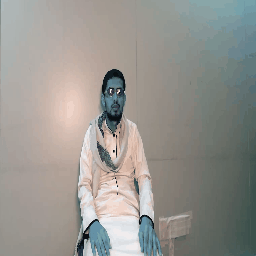

In [ ]:
to_gif(np.array(testlist['8'][5]))